# <center>Interpolation using Python (v3.8.8)</center>
<center>Jimuel Celeste, Jr.</center>

## School Re-opening in Quezon City, Philippines (INCREASE (%) IN INFECTIONS)

The dataset is generated from our COVID-19 agent-based model. 

The model accounts for:
- quarantine
- age
- non-linear incidence rates (i.e., behavioral and disease-resistance factors)
- vaccination
- vaccine efficacy (Estimated Value: 70%)

We simulated school re-opening scenarios in Quezon City using the model. 

Simulation Date: July 24, 2021

![covid 19 agent-based model](covid-abm.png "COVID-19 Agent-Based Model")

## Data Points: Increase (%) in Infections (n = 5)

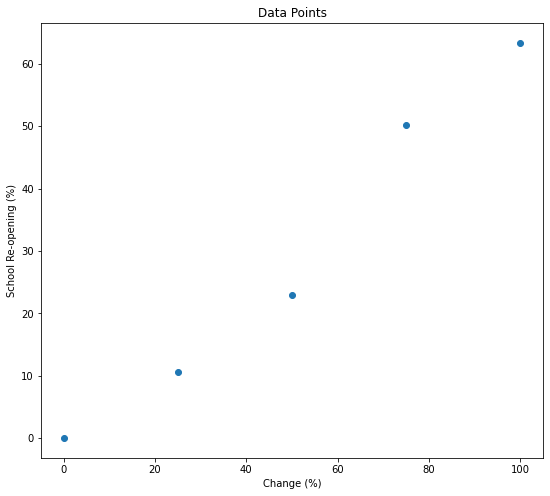

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

x = [0, 25, 50, 75, 100] # School re-opening coverage (%)
y = [0, 10.63, 23, 50.22, 63.38] # Increase in infections

x_new = np.linspace(0, 100, num=100, endpoint=True)

plt.figure(1,(9,8))
plt.scatter(x, y)
plt.title("Data Points")
plt.xlabel('Change (%)')
plt.ylabel('School Re-opening (%)')
plt.savefig("data_points.png", dpi=500, bbox_inches='tight')
plt.show()

## Linear Interpolation (SciPy)

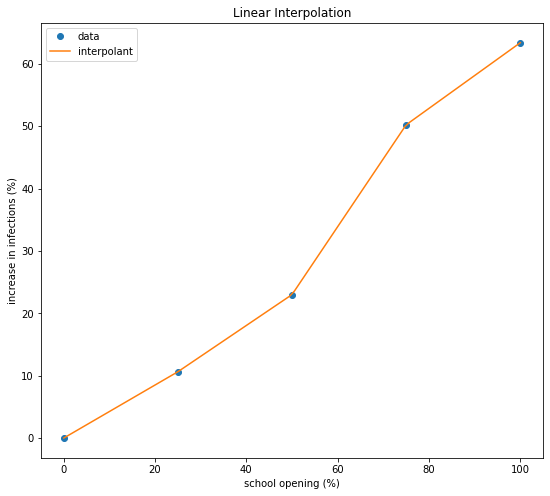

In [2]:
from scipy.interpolate import interp1d

f = interp1d(x, y, kind='linear')

plt.figure(2,(9,8))
plt.plot(x,y,'o', x_new, f(x_new), '-')
plt.title("Linear Interpolation")
plt.xlabel("school opening (%)")
plt.ylabel("increase in infections (%)")
plt.legend(['data', 'interpolant'])
plt.show()

## Iterpolation with Monomial Basis (Numpy)

[-4.48213333e-06  8.12160000e-04 -3.99106667e-02  9.85400000e-01
 -1.77948048e-13]


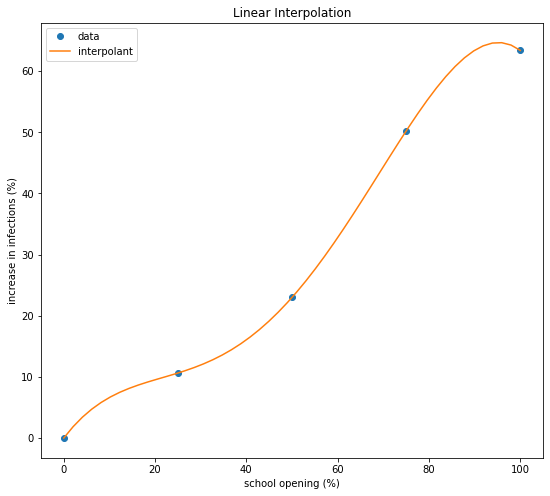

In [3]:
# Code taken from: https://www.unioviedo.es/compnum/labs/PYTHON/Interpolation.html

x1 = np.array(x)
y1 = np.array(y)

# Uses the polyfit function of numpy
pol = np.polyfit(x1, y1, len(x1)-1)  # polynomial coefficients

x_new = np.linspace(min(x1),max(x1))
y_new = np.polyval(pol, x_new) 

print(pol)

plt.figure(3, (9,8))
plt.plot(x1, y1, 'o', x_new, y_new, '-')
plt.title("Linear Interpolation")
plt.xlabel("school opening (%)")
plt.ylabel("increase in infections (%)")
plt.legend(['data', 'interpolant'])
plt.show()

## Lagrange Interpolation (SciPy)

[-4.48213333e-06  8.12160000e-04 -3.99106667e-02  9.85400000e-01
  0.00000000e+00]


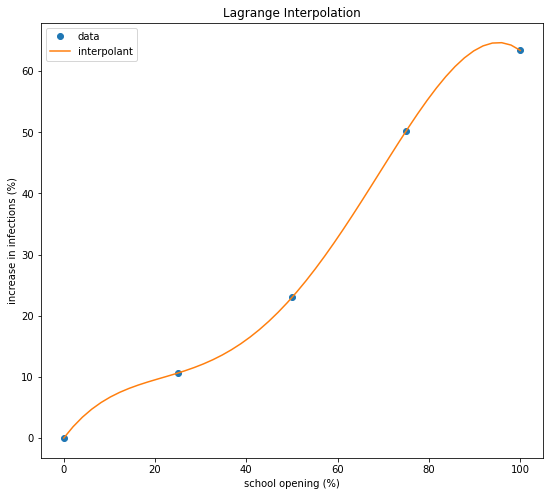

In [4]:
import scipy

f = scipy.interpolate.lagrange(x,y)
print(f.coeffs)

plt.figure(4,(9,8))
plt.plot(x,y,'o', x_new, f(x_new), '-')
plt.title("Lagrange Interpolation")
plt.xlabel("school opening (%)")
plt.ylabel("increase in infections (%)")
plt.legend(['data', 'interpolant'])
plt.show()

## Newton Interpolation

[-4.48213333e-06  1.39840000e-04  1.39200000e-03  4.25200000e-01
  0.00000000e+00]


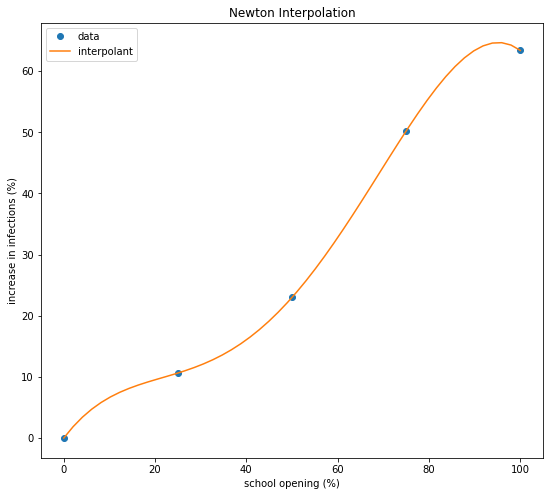

In [5]:
# Code taken from the work of Korstanje: 
# Kornstanje, J. (2021). Polynomial Interpolation, [blog], URL: https://towardsdatascience.com/polynomial-interpolation-3463ea4b63dd, [Accessed on October 3, 2021].

# Credits to stack overflow for this code

def _poly_newton_coefficient(x, y):    
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p, a 

f, coeffs = newton_polynomial(x, y, x_new)
print(coeffs[::-1])

plt.figure(5,(9,8))
plt.plot(x, y, 'o', x_new, f, '-')
plt.title("Newton Interpolation")
plt.xlabel("school opening (%)")
plt.ylabel("increase in infections (%)")
plt.legend(['data', 'interpolant'])
plt.show()

# <center> Wakas </center>